Timestamp: 1719823783, ISS's present location: Latitude: -50.297236985573, Longitude: 84.164668877543
Timestamp: 1719823794, ISS's present location: Latitude: -50.468898446644, Longitude: 85.192285091542
Timestamp: 1719823805, ISS's present location: Latitude: -50.630599750735, Longitude: 86.227482587308
Timestamp: 1719823816, ISS's present location: Latitude: -50.782214391719, Longitude: 87.269890016603
Timestamp: 1719823828, ISS's present location: Latitude: -50.93596937241, Longitude: 88.414839491125
Timestamp: 1719823839, ISS's present location: Latitude: -51.066116512594, Longitude: 89.471061821591
Timestamp: 1719823851, ISS's present location: Latitude: -51.196191919235, Longitude: 90.630087756461
Timestamp: 1719823862, ISS's present location: Latitude: -51.304409845088, Longitude: 91.698258594346
Timestamp: 1719823873, ISS's present location: Latitude: -51.40199643474, Longitude: 92.771438803642
Timestamp: 1719823884, ISS's present location: Latitude: -51.488868612002, Longitude

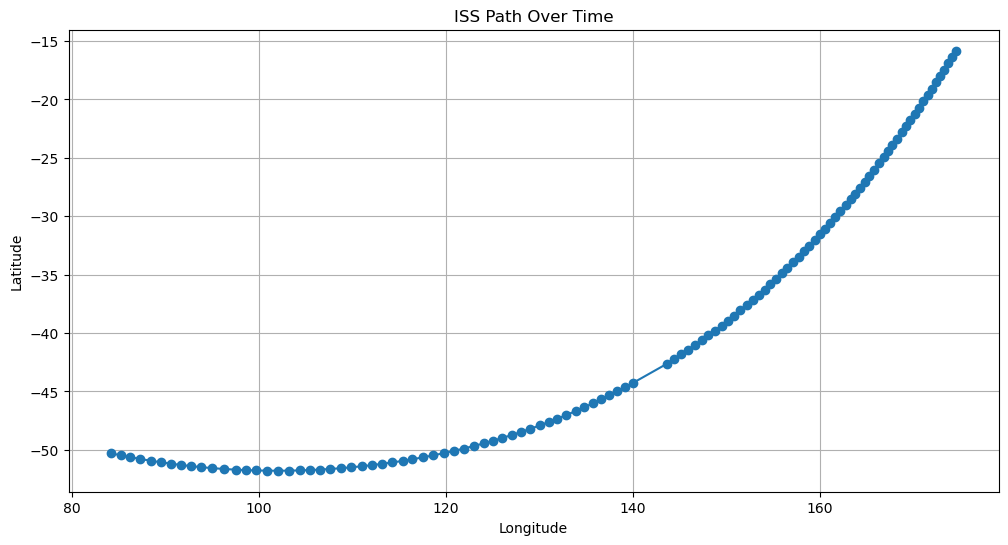

In [23]:
import requests
import time 
import matplotlib.pyplot as plt

def iss_location():
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    data = response.json()
    latitude = data["latitude"]
    longitude = data["longitude"]
    timestamp = data["timestamp"]
    return latitude, longitude, timestamp

with open("iss.txt", "w") as file:
    file.write("latitude,longitude,timestamp\n")
    
    timestamps, latitudes, longitudes = [], [], []

    for _ in range(110):
        latitude, longitude, timestamp = iss_location()
        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(timestamp)
        file.write(f"{latitude},{longitude},{timestamp}\n")
        file.flush()

        print(f"Timestamp: {timestamp}, ISS's present location: Latitude: {latitude}, Longitude: {longitude}")
        
        time.sleep(10)

plt.figure(figsize=(12, 6))
plt.plot(longitudes, latitudes, marker='o')
plt.title('ISS Path Over Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()